# Prepare data for training

- use target series (with maximum delay of 4 weeks) from when it's available (national level start earlier than age groups)
- do the same for ARE

### Setup

In [1]:
import sys
sys.path.append('../')
from config import *
from src.realtime_utils import *

# Load data

In [2]:
end_date = '2024-09-19'

### SARI

In [3]:
sari_rt_start = pd.Timestamp('2023-09-24')

target_sari = load_target_series('sari')
latest_sari = load_latest_series('sari')

ts1 = latest_sari.drop_after(sari_rt_start)
ts2 = target_sari[sari_rt_start :]

ts_sari = ts1.concatenate(ts2)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<Axes: xlabel='date'>

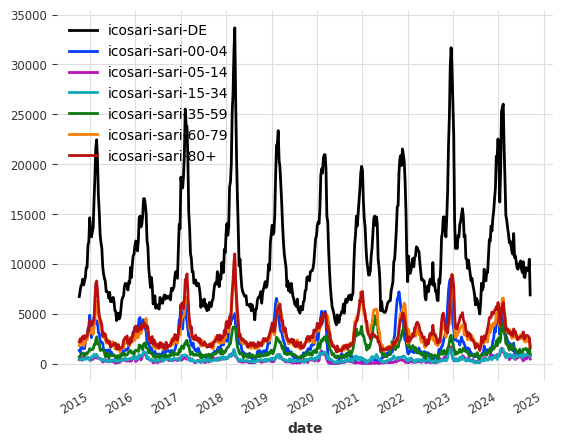

In [4]:
ts_sari.plot()

### ARE

In [5]:
target_are = load_target_series('are')
latest_are = load_latest_series('are')

t1 = latest_are.drop_after(target_are.start_time())

ts_are = concatenate([latest_are.drop_after(target_are.start_time()), target_are])

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<Axes: xlabel='date'>

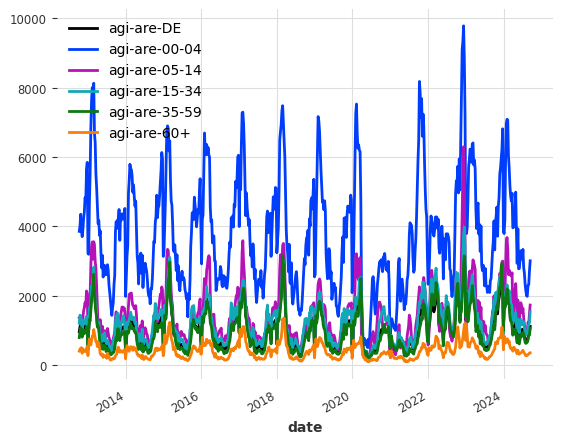

In [6]:
ts_are.plot()

# Loading function

In [31]:
def load_realtime_training_data():
    # load sari data
    sari_rt_start = pd.Timestamp('2023-09-24')
    target_sari = load_target_series('sari')
    latest_sari = load_latest_series('sari')
    ts1 = latest_sari.drop_after(sari_rt_start)
    ts2 = target_sari[sari_rt_start :]
    ts_sari = ts1.concatenate(ts2)
    
    # load are data
    target_are = load_target_series('are')
    latest_are = load_latest_series('are')
    t3 = latest_are.drop_after(target_are.start_time())
    ts_are = concatenate([latest_are.drop_after(target_are.start_time()), target_are])
    
    return ts_sari, ts_are

In [7]:
targets, covariates = load_realtime_training_data()

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<Axes: xlabel='date'>

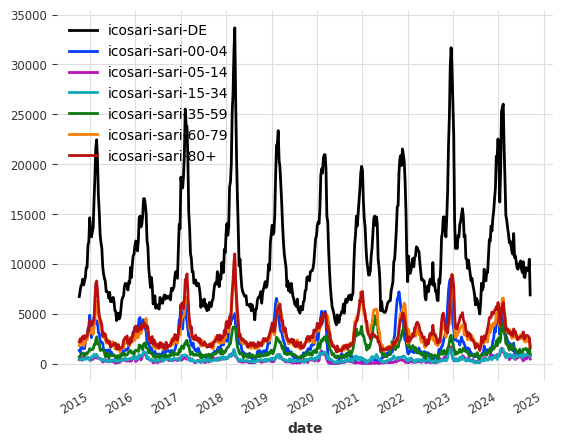

In [8]:
targets.plot()

<Axes: xlabel='date'>

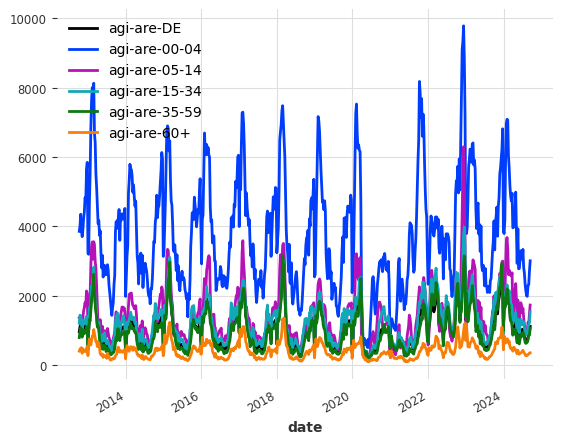

In [9]:
covariates.plot()